## 2D motion with constant acceleration

In [1]:
from sympy.vector import CoordSys3D
from sympy import symbols, Function, Eq

# Define a 3D coordinate system
N = CoordSys3D('N')

t = symbols('t')  # time variable
i = N.i  # unit vector in x-direction
j = N.j  # unit vector in y-direction
k = N.k  # unit vector in z-direction

# x, y coordinates as functions of time
x = Function('x')(t)
y = Function('y')(t)

r = x * i + y * j  # position vector in 2D plan
r

(x(t))*N.i + (y(t))*N.j

In [2]:
v = r.diff(t)  # velocity vector
v

(Derivative(x(t), t))*N.i + (Derivative(y(t), t))*N.j

In [3]:
a = v.diff(t)  # acceleration vector
a.simplify()

(Derivative(x(t), (t, 2)))*N.i + (Derivative(y(t), (t, 2)))*N.j

In [4]:
a_x, a_y = symbols("a_x a_y")
acc = a_x * i + a_y * j  # constant acceleration vector

# Integrate acceleration to get velocity (+ constant)
C_1_x, C_1_y = symbols("v_i_x v_i_y")
C_1 = C_1_x * i + C_1_y * j
v_integrated = acc.integrate(t) + C_1
v_integrated_simplified = v_integrated.simplify()
v_integrated_simplified

(a_x*t + v_i_x)*N.i + (a_y*t + v_i_y)*N.j

In [5]:
# Integrate velocity to get position (+ constant)
C_2_x, C_2_y = symbols("r_i_x r_i_y")
C_2 = C_2_x * i + C_2_y * j
r_integrated = v_integrated.integrate(t) + C_2
r_integrated_simplified = r_integrated.simplify()
r_integrated_simplified

(a_x*t**2/2 + r_i_x + t*v_i_x)*N.i + (a_y*t**2/2 + r_i_y + t*v_i_y)*N.j

In [6]:
### Better notation: Matrix 
from sympy import Matrix 

r = Matrix([x,y])
r

Matrix([
[x(t)],
[y(t)]])

In [7]:
v = r.diff(t)
v

Matrix([
[Derivative(x(t), t)],
[Derivative(y(t), t)]])

In [8]:
a = v.diff(t)  # acceleration vector
a

Matrix([
[Derivative(x(t), (t, 2))],
[Derivative(y(t), (t, 2))]])

In [9]:
a = Matrix([a_x, a_y])
a

Matrix([
[a_x],
[a_y]])

In [10]:
v_i_x, v_i_y = symbols("v_i_x v_i_y")
v = a.integrate(t) + Matrix([v_i_x, v_i_y])
v

Matrix([
[a_x*t + v_i_x],
[a_y*t + v_i_y]])

In [11]:
r_i_x, r_i_y = symbols("r_i_x r_i_y")
r = v.integrate(t) + Matrix([r_i_x, r_i_y])
r

Matrix([
[a_x*t**2/2 + r_i_x + t*v_i_x],
[a_y*t**2/2 + r_i_y + t*v_i_y]])

### Example 4.1

A particle starts from the origin at t  0 with an initial velocity having an x component of 20 m/s and a y component of $-15$ m/s. The particle moves in the xy plane with an x component of acceleration only, given by ax  $4.0 m/s^2$. 

(A) Determine the total velocity vector at any time.

In [12]:
from sympy import symbols, Function, Eq, integrate, solve
from sympy.vector import CoordSys3D

# Define coordinate system and time symbol
N = CoordSys3D("N")
t = symbols("t", real=True)


# given constant  
a_x = 4.0  # m/s^2
v_x_0 = 20.0  # m/s
v_y_0 = -15.0  # m/s

# unit vector
i = N.i
j = N.j

# Acceleration vector
a = a_x * i + 0 * j

# integrate acceleration to get velocity
C_1_x, C_1_y = symbols("C_1_x C_1_y")
C_1 = C_1_x * i + C_1_y * j

v = a.integrate(t) + C_1

# apply initial conditions to find constants
v_0 = v_x_0 * i + v_y_0 * j

eq1 = Eq(v.subs(t, 0), v_0) # set t=0
sol = solve(eq1, (C_1_x, C_1_y))

v = v.subs({C_1_x: sol[C_1_x], C_1_y: sol[C_1_y]})
v.simplify()

(4.0*t + 20.0)*N.i + (-15.0)*N.j

(B) Calculate the velocity and speed of the particle at t  5.0 s.

In [13]:
# velocity
v.subs(t, 5.0)  # velocity at t=5.0s

# speed 
speed = v.magnitude().subs(t, 5.0)
speed

42.7200187265877

(C) Determine the x and y coordinates of the particle at any time t and its position vector at this time.

In [14]:
# assume initial position is at origin
r_x_0, r_y_0 = 0, 0
r_0 = r_x_0 * i + r_y_0 * j

# integrate velocity to get position
C_2_x, C_2_y = symbols("C_2_x C_2_y")
C_2 = C_2_x * i + C_2_y * j

r = v.integrate(t) + C_2
r = r.simplify()

eq2 = Eq(r.subs(t, 0), r_0)  # set t=0
sol2 = solve(eq2, (C_2_x, C_2_y))

r.subs({C_2_x: sol2[C_2_x], C_2_y: sol2[C_2_y]})

(2.0*t**2 + 20.0*t)*N.i + (-15.0*t)*N.j

## Projectile Motion

### Horizontal range and maximum height of a projectile

In [15]:
from sympy import symbols, cos, sin
t = symbols("t", real=True)
v_x, v_y = Function("v_x")(t), Function("v_y")(t)
a_x, a_y = symbols("a_x a_y") # constant accelerations
g = symbols("g")  # m/s^2, acceleration due to gravity
a_y = -g  # acceleration in y direction due to gravity

v_mag, v_theta = symbols("v_mag v_theta")  # initial speed and angle
v_x_0 = v_mag * cos(v_theta)  # initial velocity in x direction
v_y_0 = v_mag * sin(v_theta)  # initial velocity in y direction

# in maximum height, v_y = 0
v_y = a_y * t + v_y_0
t_max_height = solve(Eq(v_y, 0), t)[0]

# maximum height
r_y = v_y.integrate(t) + 0  # initial position in y direction is 0
h_max = r_y.subs(t, t_max_height)
h_max.simplify()

v_mag**2*sin(v_theta)**2/(2*g)

In [16]:
# maximum range when r_y = 0
r_x = v_x_0 * t  # position in x direction

travel_time = solve(Eq(r_y, 0), t)
range_max = r_x.subs(t, travel_time[1])
range_max.simplify()

v_mag**2*sin(2*v_theta)/g

In [17]:
# find the maximum v_theta for maximum range, the range of v_theta is [0, pi/2]
from sympy import pi, solveset, Interval
v_theta_max = symbols("v_theta_max")
range_max = range_max.subs(v_theta, v_theta_max)

eq = Eq(range_max.diff(v_theta_max).simplify(),0)
sol = solveset(eq, v_theta_max, domain=Interval(0, pi / 2))
sol

{pi/4}

### Example 4.2 

A long jumper (Fig. 4.11) leaves the ground at an angle of 20.0° above the horizontal and at a speed of 11.0 m/s.

(A) How far does he jump in the horizontal direction?

In [18]:
range_max

2*v_mag**2*sin(v_theta_max)*cos(v_theta_max)/g

In [19]:
v_0_mag = symbols("v_0_mag")
v_0_theta = symbols("v_0_theta")

v_0_mag = 11.0 # m/s
v_0_theta = 20.0 * pi / 180  # convert degree to radian
g = 9.81  # m/s^2

range_max.subs({v_mag: v_0_mag, v_theta: v_0_theta, g: g}).evalf()

242.0*sin(v_theta_max)*cos(v_theta_max)/g

(B) What is the maximum height reached?

In [20]:
h_max


v_mag**2*sin(v_theta)**2/(2*g)

In [21]:
h_max.subs({v_mag: v_0_mag, v_theta: v_0_theta, g: g}).evalf()

7.07715559565092/g

In [22]:
7.077 / 9.81

0.7214067278287462

### Example 4.3

In a popular lecture demonstration, a projectile is fired at a target in such a way that the projectile leaves the gun at the same time the target is dropped from rest. Show that if the gun is initially aimed at the stationary target, the projectile hits the falling target as shown in Figure 4.12a.
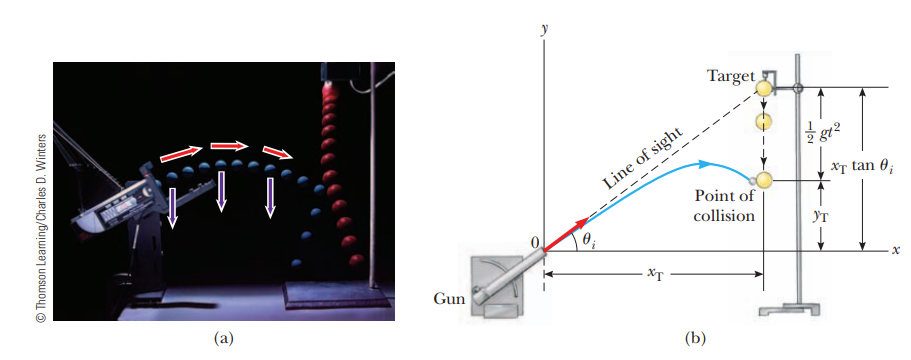

- both objects are subject only to gravity.
- target moves freely in one dimension (vertical)
- projectile moves in two dimensions (horizontal and vertical)

In [23]:
from sympy import tan
t = symbols("t", real=True)
g = symbols("g")  # m/s^2

# target
x_target_0, y_target_0 = symbols("x_target_0 y_target_0")
x_target = Function("x_target")(t)
y_target = Function("y_target")(t)

dot_x_target = 0  # target only moves in vertical direction
dot_y_target = -g * t  # acceleration due to gravity

# projectile
x_projectile, y_projectile = symbols("x_projectile y_projectile")
x_projectile = Function("x_projectile")(t)
y_projectile = Function("y_projectile")(t)

dot_x_projectile = x_projectile.diff(t)
dot_y_projectile = y_projectile.diff(t)

v_0_mag, v_0_theta = symbols("v_0_mag v_0_theta")

dot_x_projectile = v_0_mag * cos(v_0_theta)
dot_y_projectile = v_0_mag * sin(v_0_theta) - g * t

# observations at t=0
y_target_0 = x_target_0 * tan(v_0_theta)
y_target = dot_y_target.integrate(t) + y_target_0
y_target = y_target.simplify()
# y_target = y_target_0 - (1/2) * g * t**2

# find y_projectile
y_projectile = integrate(dot_y_projectile, t) + 0  # initial position is 0
y_projectile = y_projectile.simplify()

# time when projectile travel to x_target_0
t_hit = x_target_0 / dot_x_projectile

# y position of projectile when it reaches x_target_0
y_projectile_hit = y_projectile.subs(t, t_hit)
y_projectile_hit = y_projectile_hit.simplify()

# y position of target when projectile reaches x_target_0
y_target_hit = y_target.subs(t, t_hit)
y_target_hit = y_target_hit.simplify()

In [24]:
y_projectile_hit - y_target_hit
# if the difference is zero, projectile hits the target

0

In [25]:
y_target


-g*t**2/2 + x_target_0*tan(v_0_theta)

### Example 4.4

A stone is thrown from the top of a building upward at an angle of 30.0° to the horizontal with an initial speed of 20.0 m/s as shown in Figure 4.13. The height of the building is 45.0 m.

In [26]:
from sympy import symbols, Function, cos, sin, pi, integrate, simplify, S

# define symbols
t = symbols("t", real=True)
# g = symbols("g", positive=True)

# initial conditions
v_mag, v_theta = symbols("v_mag v_theta", real=True)

# assign numeric values after symbolic setup
v_mag = 20.0
v_theta = 30.0 * pi / 180

r_y_0 = 45.0  # height in meters
r_x_0 = 0.0

# initial velocity components
v_x_0 = v_mag * cos(v_theta)
v_y_0 = v_mag * sin(v_theta)

# accelerations (use SymPy expressions!)
a_x = S(0)  # symbolic zero
a_y = -9.81  # symbolic acceleration

# integrate accelerations to get velocities
v_x = integrate(a_x, t) + v_x_0
v_y = integrate(a_y, t) + v_y_0

# integrate velocities to get positions
r_x = integrate(v_x, t) + r_x_0
r_y = integrate(v_y, t) + r_y_0


In [27]:
v_y


-9.81*t + 20.0*sin(0.166666666666667*pi)

(A) How long does it take the stone to reach the ground?

In [28]:
sol = solve(Eq(r_y, 0), t)
sol

[-2.17647665854140, 4.21521264223151]

(B) What is the speed of the stone just before it strikes the ground?

In [29]:
from sympy import sqrt
v_y_final = v_y.subs(t, sol[1])
v_x_final = v_x.simplify()

sol = sqrt(v_x_final**2 + v_y_final**2).evalf()
sol

35.8175934423294

### Example 4.5 

A ski jumper leaves the ski track moving in the horizontal direction with a speed of 25.0 m/s as shown in Figure 4.14. The landing incline below her falls off with a slope of 35.0°. Where does she land on the incline?

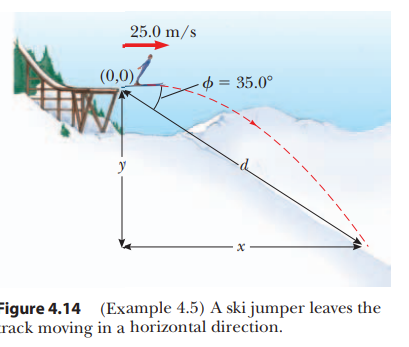

In [30]:
from sympy import symbols, Function, cos, sin, pi, integrate, simplify, S

# define symbols
t = symbols("t", real=True)
# g = symbols("g", positive=True)

# initial conditions
v_mag, v_theta = symbols("v_mag v_theta", real=True)

# assign numeric values after symbolic setup
v_mag = 25.0
v_theta = 45.0 * pi / 180

r_y_0 = 0.0  # height in meters
r_x_0 = 0.0

# initial velocity components
v_x_0 = v_mag * cos(v_theta)
v_y_0 = v_mag * sin(v_theta)

# accelerations (use SymPy expressions!)
a_x = S(0)  # symbolic zero
a_y = -9.81  # symbolic acceleration

# integrate accelerations to get velocities
v_x = integrate(a_x, t) + v_x_0
v_y = integrate(a_y, t) + v_y_0

# integrate velocities to get positions
r_x = integrate(v_x, t) + r_x_0
r_y = integrate(v_y, t) + r_y_0


In [31]:
# express the landing spot on the slope 
d = symbols("d", real=True)
x_final = d * cos(35.0 * pi / 180)
y_final = -d * sin(35.0 * pi / 180)

# when the projectile lands on the slope
eq1 = Eq(r_x, x_final)
eq2 = Eq(r_y, y_final)

# express t in eq1
t_landing = solve(eq1, t)[0]
# substitute t in eq2 to solve for d
eq2_subs = eq2.subs(t, t_landing)
d_landing = solve(eq2_subs, d)[1]
d_landing

# substitute d_landing back to x_final and y_final
x_landing = x_final.subs(d, d_landing).evalf()
y_landing = y_final.subs(d, d_landing).evalf()
t_landing = t_landing.subs(d, d_landing).evalf()
x_landing, y_landing, t_landing

(108.321071496542, -75.8472308088314, 6.12756513604779)

In [32]:
d_landing

132.235611510391

### Exercises 1

A motorist drives south at 20.0 m/s for 3.00 min, then turns west and travels at 25.0 m/s for 2.00 min, and finally travels northwest at 30.0 m/s for 1.00 min. For this 6.00-min trip.

find (a) the total vector displacement

(b) the average speed

(c) the average velocity

### Exercises 2

A golf ball is hit off a tee at the edge of a cliff. Its x and y coordinates as functions of time are given by the following expressions:

$$
x = (18.0 m/s)t \\
y = (4.00 m/s)t - (4.90 m/s^2)t^2
$$


(a) Write a vector expression for the ball’s position as a function of time, using the unit vectors and .

## 2D circular motion

In [48]:
t = symbols("t", real=True)
R = symbols("R", positive=True) # radius of circular motion
omega = symbols("omega", real=True)  # angular velocity

x = R * cos(omega * t)
y = R * sin(omega * t)

v_x = x.diff(t)
v_y = y.diff(t)

a_x = v_x.diff(t)
a_y = v_y.diff(t)


In [49]:
# Matrix format
r = Matrix([x, y])
v = r.diff(t)
a = v.diff(t)

In [53]:
# magnitudes
v_mag = sqrt(v_x **2 + v_y **2)
a_mag = sqrt(a_x **2 + a_y **2)

In [54]:
from sympy import trigsimp
a_mag_simplified = trigsimp(a_mag)
a_mag_simplified

R*omega**2

### Satellite orbiting a planet

A satellite orbits a planet in a circular path of radius 𝑅 = 7000 km with a period 𝑇 = 6000 s.

We want to find:

1. $\omega$ : the satellite's angular velocity
2. $v$ : the satellite's linear velocity
3. $a_{c}$ : the satellite's acceleration


In [60]:
# given values
R_val = 7000e3  # radius
T_val = 6000 # Period

# define symbols 
R, T, t = symbols("R T t", positive=True, real=True)
omega = symbols("omega", positive=True, real=True)

# relationship between angular velocity and period
omega_eq = Eq(omega, 2 * pi / T)

# substitude numerical values 
omega_val = omega_eq.subs(T, T_val)
solve(omega_val, omega)[0]

pi/3000

In [61]:
v = omega * R
v_val = v.subs({omega: solve(omega_val, omega)[0], R: R_val})
v_val.evalf()

7330.38285837618

In [62]:
a_c = R * omega**2
a_c_val = a_c.subs({omega: solve(omega_val, omega)[0], R: R_val})
a_c_val.evalf()

7.67635897862506

### Rotating Arm with angular acceleration

A robotic arm of length $ R = 2\,\text{m} $ starts from rest and **rotates** in a circular path with a **constant angular acceleration**

$$
\alpha = 1.5\,\text{rad/s}^2.
$$

Find:

1. Angular velocity $ \omega(t) $  
2. Angular displacement $ \theta(t) $  
3. Tangential and centripetal acceleration components  
4. Symbolic expressions for **position**, **velocity**, and **acceleration**


In [64]:
t = symbols("t", real=True)
R = 2.0 # radius in meters
omega = Function("omega")(t)
alpha = 1.5 # angular acceleration in rad/s^2

omega = integrate(alpha, t) + 0  # initial angular velocity is 0
omega

1.5*t

In [65]:
theta = Function("theta")(t)
theta = integrate(omega, t) + 0  # initial angular position is 0
theta

0.75*t**2

In [66]:
# tangential acceleration
a_tangential = R * alpha
a_tangential

3.0

In [67]:
# centripetal acceleration
a_centripetal = R * omega**2
a_centripetal

4.5*t**2

In [68]:
# position
r = Matrix([R * cos(theta), 
            R * sin(theta)])

# velocity
v = r.diff(t)

# acceleration
a = v.diff(t)

In [71]:
r

Matrix([
[2.0*cos(0.75*t**2)],
[2.0*sin(0.75*t**2)]])